# Google Research Football

การนำ Deep Learning มาใช้กับ Game Engine เพื่อสร้าง AI ให้สามารถเรียนรู้วิธีการเล่นอย่าง Alpha Go, OpenAI ฯลฯ โดยใช้ Reinforcement Learning นั้น คราวนี้ก็มาถึงเกม Football กันบ้าง ซึ่งถูกพัฒนาโดย [Google Research](https://ai.googleblog.com/2019/06/introducing-google-research-football.html) นอกจาก Game Engine แล้ว ยังมี Football Benchmark ที่ใช้ในการวัด Performance และในส่วนของ Football Academy ในการให้คะแนนก็จะแบ่งเป็น Score เมื่อทำประตูได้ และ Checkpoint เมื่อนำลูกเข้าใกล้ประตู

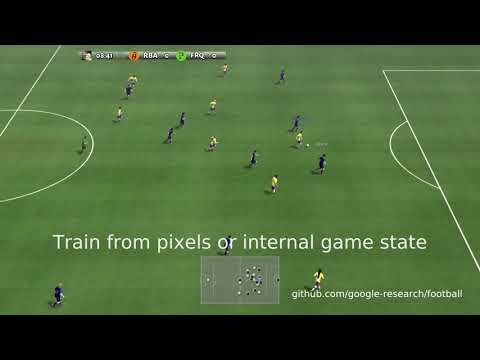

In [ ]:
from IPython.display import YouTubeVideo
YOUTUBE_ID = 'F8DcgFDT9sc'
YouTubeVideo(YOUTUBE_ID)

In [ ]:
! apt-get update

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:2 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:4 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:5 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]
Get:6 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:7 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Ign:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Get:11 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release [564 B]
Get:12 https://developer.download.nvidia.com/compute/machine-learning/repos

In [ ]:
! git clone https://github.com/google-research/football.git

Cloning into 'football'...
remote: Enumerating objects: 1173, done.
remote: Total 1173 (delta 0), reused 0 (delta 0), pack-reused 1173
Receiving objects: 100% (1173/1173), 26.45 MiB | 15.09 MiB/s, done.
Resolving deltas: 100% (336/336), done.


In [ ]:
! apt-get install git cmake build-essential libgl1-mesa-dev libsdl2-dev libsdl2-image-dev libsdl2-ttf-dev libsdl2-gfx-dev libboost-all-dev libdirectfb-dev libst-dev mesa-utils xvfb x11vnc libsqlite3-dev glee-dev libsdl-sge-dev python3-pip -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.4ubuntu1).
cmake is already the newest version (3.10.2-1ubuntu2).
libboost-all-dev is already the newest version (1.65.1.0ubuntu1).
git is already the newest version (1:2.17.1-1ubuntu0.4).
libgl1-mesa-dev is already the newest version (18.2.8-0ubuntu0~18.04.2).
libgl1-mesa-dev set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  gir1.2-ibus-1.0 lib++dfb-1.7-7 liba52-0.7.4 libcaca-dev libcapnp-0.6.1
  libdbus-1-dev libdirectfb-1.7-7 libglee0d1 libibus-1.0-5 libibus-1.0-dev
  libmirclient-dev libmirclient9 libmircommon-dev libmircommon7
  libmircookie-dev libmircookie2 libmircore-dev libmircore1 libmirprotobuf3
  libmpeg3-2 libmpeg3-dev libprotobuf-dev libprotobuf-lite10 libpulse-dev

In [ ]:
% cd football

/content/football


## Fix Code
หากทำการ Install gfootball แล้วตามด้วยคำสั่ง --process-dependency-links จะเกิด Error เนื่องจากใน pip เวอร์ชั่นใหม่ ๆ จะไม่สามารถใช้คำสั่งนี้ได้ ให้ทำการ Downgrade pip https://github.com/pypa/pip/issues/6162

In [ ]:
! pip install pip==9.0.0

     |████████████████████████████████| 1.3MB 10.2MB/s 
  Found existing installation: pip 19.1.1
    Uninstalling pip-19.1.1:
      Successfully uninstalled pip-19.1.1


In [ ]:
! pip install gfootball[tf_gpu] --process-dependency-links

    100% |████████████████████████████████| 11.0MB 115kB/s 
  DEPRECATION: Dependency Links processing has been deprecated and will be removed in a future release.
    100% |████████████████████████████████| 11.4MB 126kB/s 
  Cloning https://github.com/openai/baselines.git (to master) to /tmp/pip-build-qzaomdxz/baselines
  DEPRECATION: Dependency Links processing has been deprecated and will be removed in a future release.
    100% |████████████████████████████████| 377.0MB 3.6kB/s 
tcmalloc: large alloc 1073750016 bytes == 0x559a0000 @  0x7fd93fe862a4 0x5a1987 0x622a5b 0x4f86ba 0x4f98c7 0x4f7a28 0x4f876d 0x4f98c7 0x4f6128 0x4f7d60 0x4f876d 0x4f98c7 0x4f6128 0x4f7d60 0x4f876d 0x4f98c7 0x4f6128 0x4f7d60 0x4f876d 0x4fa6c0 0x4f7a28 0x4f876d 0x4f98c7 0x4f6128 0x4f7d60 0x4f876d 0x4fa6c0 0x4f6128 0x4f7d60 0x4f876d 0x4fa6c0
    100% |████████████████████████████████| 3.2MB 379kB/s 


In [ ]:
! python -m gfootball.examples.run_ppo2 --level=academy_empty_goal_close --write_video

https://github.com/google-research/football